In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'ieee', 'grid', 'vibrant', 'no-latex'])


#### CHES

In [3]:
# CHES Data.
index = [6, 7, 8, 9, 10, 11, 12, 13, 14]
PSOE = [4.13, 4, 3.58, 3.67, 3.8, None, None, 3.6, None]
PP = [6.63, 6.92, 8, 7.33, 7.3, np.nan, np.nan, 8.07, np.nan]
CS = [np.nan, np.nan, np.nan, np.nan, 5.56, np.nan, np.nan, 7.2, np.nan]
UP = [2.13, 2.46, 1.92, 1.83, 1.67, np.nan, np.nan, 1.93, np.nan]
VOX = [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 9.71, np.nan]

CHES = pd.DataFrame(index=index, data={
                    'PSOE': PSOE, 'PP': PP, 'CS': CS, 'UP': UP, 'VOX': VOX})
CHES


,PSOE,PP,CS,UP,VOX
6,4.13,6.63,NaN,2.13,NaN
7,4.00,6.92,NaN,2.46,NaN
8,3.58,8.00,NaN,1.92,NaN
9,3.67,7.33,NaN,1.83,NaN
10,3.80,7.30,5.56,1.67,NaN
11,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN
13,3.60,8.07,7.20,1.93,9.71
14,NaN,NaN,NaN,NaN,NaN


In [3]:
dist = CHES.PP - CHES.PSOE
dist[11] = np.nan
dist[12] = np.nan
dist = dist.sort_index()

Text(0.5, 1.0, 'Distance between PP and PSOE (CHES)')

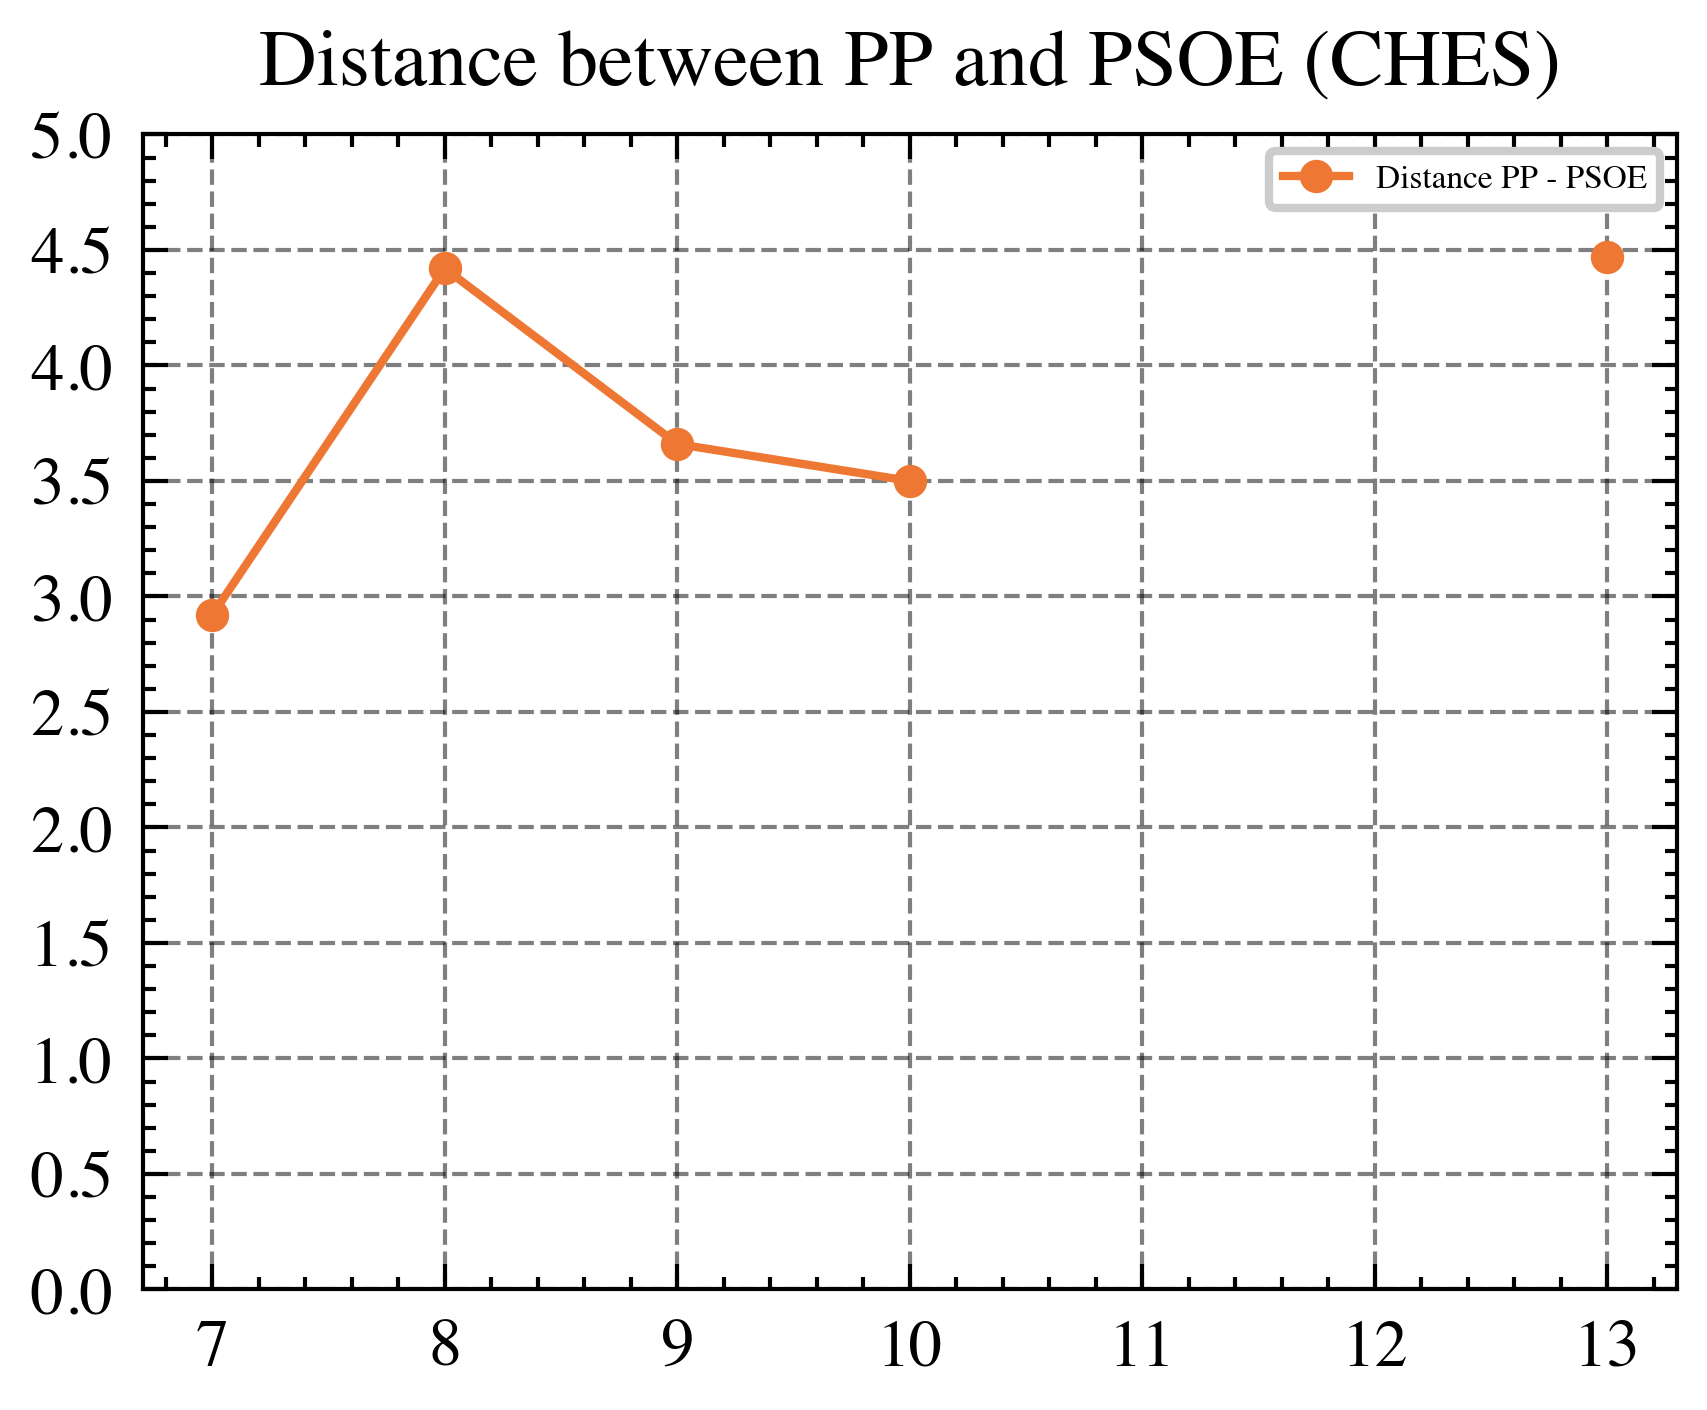

In [4]:
# Compute distance between PP & PSOE.
fig, ax = plt.subplots()
ax.plot(dist[1:], label='Distance PP - PSOE', marker='.')
ax.legend(fontsize='4')
ax.set_yticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
ax.set_title('Distance between PP and PSOE (CHES)')


In [5]:
dist2 = dist / 10

#### Simón

Text(0.5, 1.0, 'Left-Right polarisation (Simón 2019)')

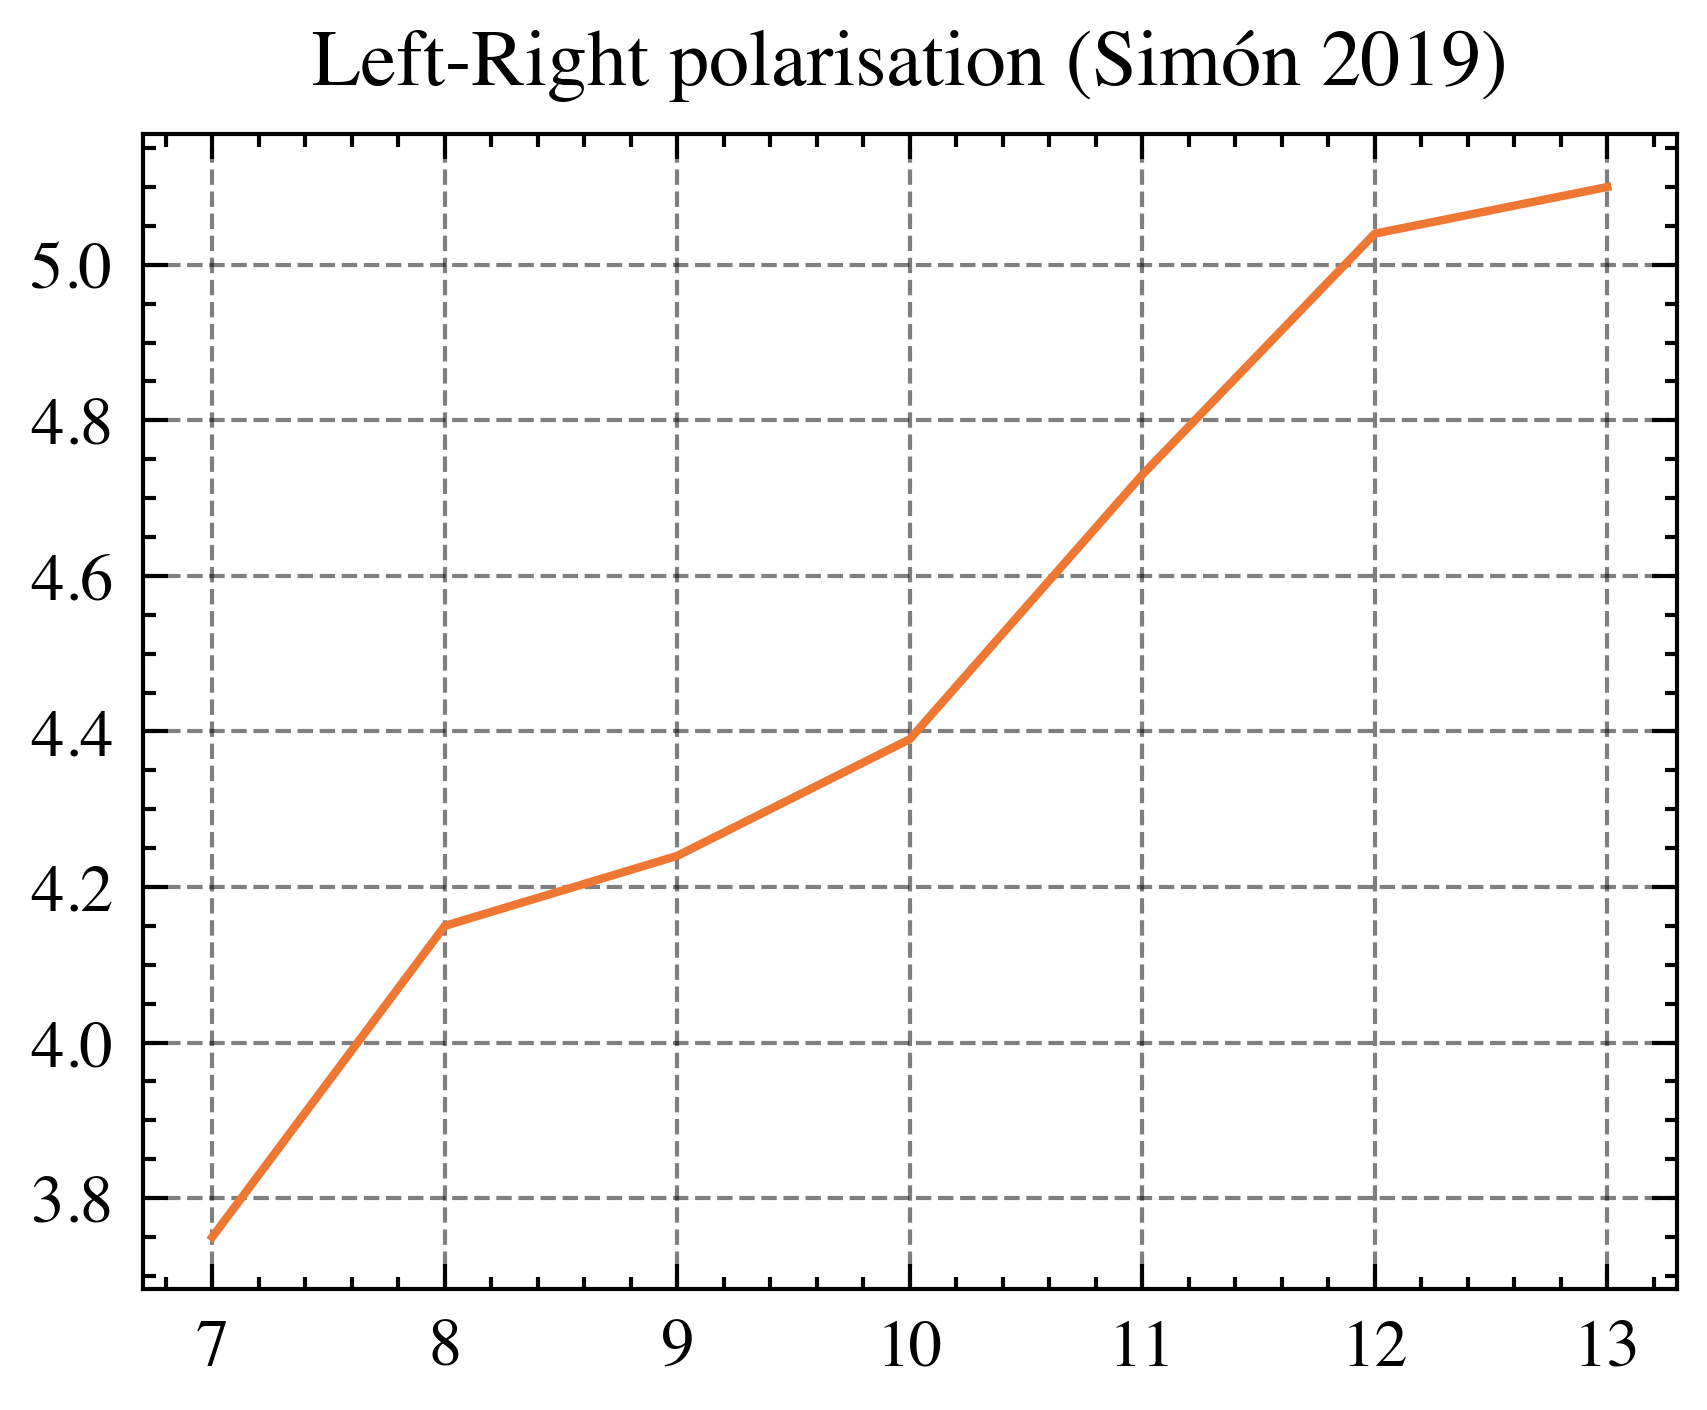

In [6]:
index = [7, 8, 9, 10, 11, 12, 13]
LRpol = [3.75, 4.15, 4.24, 4.39, 4.73, 5.04, 5.1]

simon = pd.DataFrame(index=index, data={'LRpol': LRpol})

fig, ax = plt.subplots()
ax.plot(simon)
ax.set_title('Left-Right polarisation (Simón 2019)')


In [9]:
simon.LRpolN = (simon.LRpol / 10)


/var/folders/ct/921g5yd903j7f8wh5k85dltr0000gn/T/ipykernel_33942/2308296383.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  simon.LRpolN = (simon.LRpol / 10)


#### Miller

/var/folders/ct/921g5yd903j7f8wh5k85dltr0000gn/T/ipykernel_87048/783408194.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  mi.miller2 = mi.miller / 10


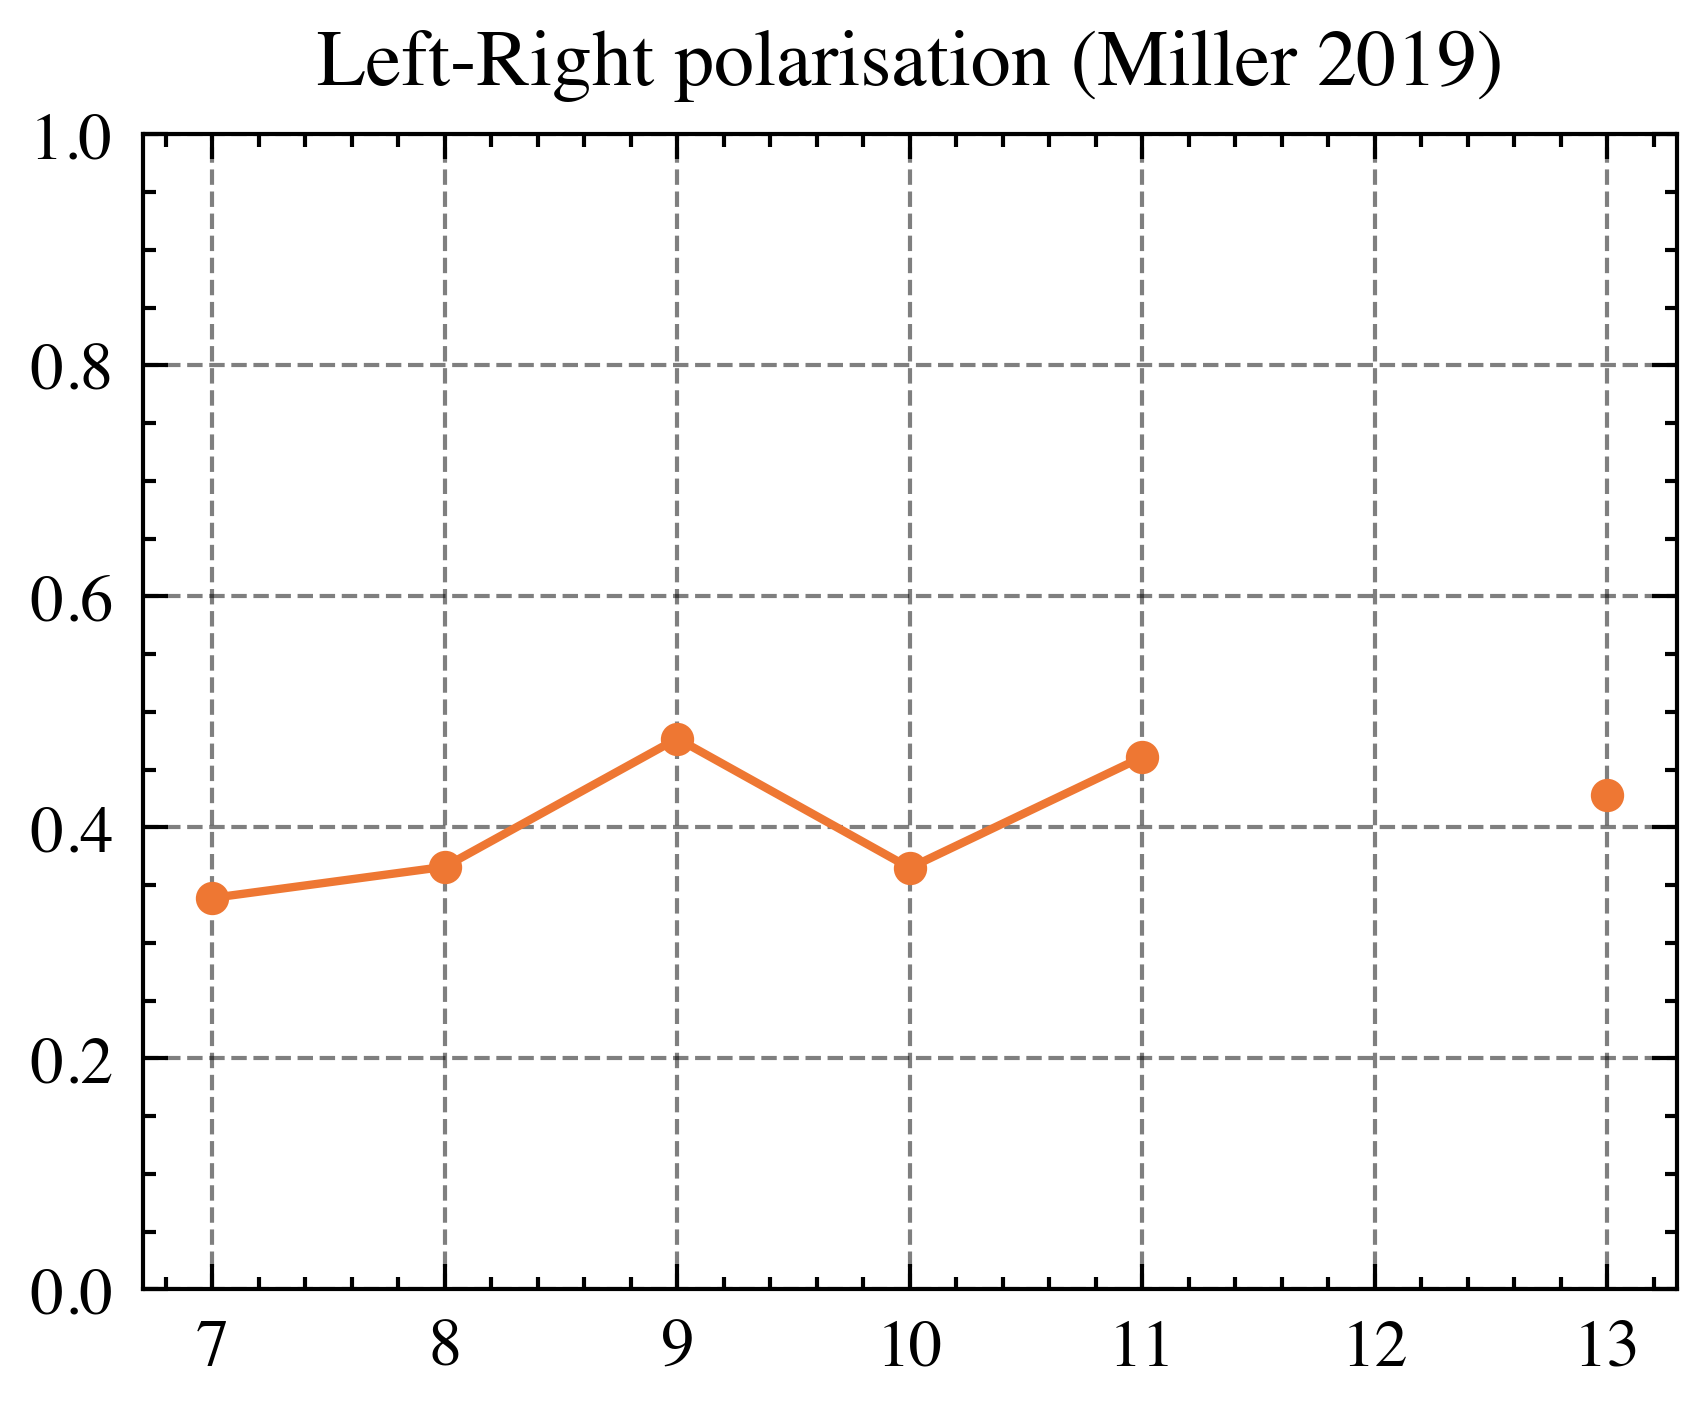

In [7]:
index = [7, 8, 9, 10, 11, 12, 13]
miller = [3.39, 3.66, 4.77, 3.65, 4.61, np.nan, 4.28]

mi = pd.DataFrame(index=index, data={'miller': miller})

mi.miller2 = mi.miller / 10

fig, ax = plt.subplots()
ax.plot(mi.miller2, marker='.')
ax.set_title('Left-Right polarisation (Miller 2019)')
ax.set_yticks([0, .2, .4, .6, .8, 1])


#### Yo: PP - PSOE

In [8]:
index = [7, 8, 9, 10, 11, 12, 13, 14]
ideo = [42.5, 37.5, 43, 45, 27.5, 32.5, 25.5, 47.5]
pp = np.array([-26.7, -22.7, -10.2, -29.7, -16.3, -22.9, -10.9, -18.1])
psoe = np.array([0.9, -7.6, 2.6, 3.3, 3.4, 5.6, 0.1, 4.4])
pp_s = (pp - -29.74) / (32.94 - - 29.74)
psoe_s = (psoe - -29.74) / (32.94 - - 29.74)


id = pd.DataFrame(index=index, data={'ideo': ideo})

id.ideo2 = (id.ideo - id.ideo.min()) / (id.ideo.max() - id.ideo.min())
id.pppsoe = psoe_s - pp_s


/var/folders/ct/921g5yd903j7f8wh5k85dltr0000gn/T/ipykernel_87048/190081872.py:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  id.ideo2 = (id.ideo - id.ideo.min()) / (id.ideo.max() - id.ideo.min())
/var/folders/ct/921g5yd903j7f8wh5k85dltr0000gn/T/ipykernel_87048/190081872.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  id.pppsoe = psoe_s - pp_s


#### Yo: ideological polarization index (L-R)


In [9]:
reduced = pd.read_csv('../data/ideological_polarisation_reduced.csv')
reduced = reduced.loc[(reduced['speaker'].str.contains('-'))]

reduced['group'] = reduced['speaker'].apply(lambda x: x.split('-')[0])
reduced['legislature'] = reduced['speaker'].apply(lambda x: x.split('-')[1])
reduced['legislature'] = reduced['legislature'].astype(int)
r = reduced.pivot(index='legislature',
                        columns='group', values='dim0').sort_index()
r

group,CS,PP,PSOE,UP,VOX
legislature,,,,,
7,NaN,-26.665987,0.917303,23.681686,NaN
8,NaN,-22.751711,-7.635203,29.693520,NaN
9,NaN,-10.210354,2.555066,NaN,NaN
10,NaN,-29.744613,3.256919,30.739548,NaN
11,-3.877763,-16.280230,3.419901,15.701415,NaN
12,-6.223811,-22.907489,5.586959,27.272369,NaN
13,-4.616407,-10.895554,0.081163,21.534404,-9.339427
14,-9.609244,-18.071832,4.425413,32.943688,-15.635264


In [11]:
idx =  [7, 8, 9, 10, 11, 12, 13, 14]
cs = [np.nan, np.nan, np.nan, np.nan, .114, .091, .163, .026]
pp = [.523, .42, .434, .529, .34, .383, .188, .251]
psoe = [.357, .469, .483, .314, .254, .24, .351, .343]
up = [0.023, 0.014, 0.014, 0.031, 0.191, 0.191, 0.12, 0.10]
vox = [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0.069, 0.149]

seats = pd.DataFrame(index = idx, data={'cs': cs, 'pp': pp, 'psoe': psoe, 'up':up, 'vox':vox})
seats

,cs,pp,psoe,up,vox
7,NaN,0.523,0.357,0.023,NaN
8,NaN,0.420,0.469,0.014,NaN
9,NaN,0.434,0.483,0.014,NaN
10,NaN,0.529,0.314,0.031,NaN
11,0.114,0.340,0.254,0.191,NaN
12,0.091,0.383,0.240,0.191,NaN
13,0.163,0.188,0.351,0.120,0.069
14,0.026,0.251,0.343,0.100,0.149


In [10]:
# My Data.
rmin = -29.745
rmax = 32.944
r.CS = 1 - (r.CS - rmin)/(rmax - rmin)
r.PP = 1 - (r.PP - rmin)/(rmax - rmin)
r.PSOE = 1 - (r.PSOE - rmin)/(rmax - rmin)
r.UP = 1 - (r.UP - rmin)/(rmax - rmin)
r.VOX = 1 - (r.VOX - rmin)/(rmax - rmin)

In [12]:
total_perc = [0.903, 0.903, 0.931, 0.874, 0.899, 0.905, 0.891, 0.869]

In [13]:
d = [(r.CS * seats.cs) / total_perc,
     (r.PP * seats.pp) / total_perc,
     (r.PSOE * seats.psoe) / total_perc,
     r.UP * seats.up / total_perc,
     r.VOX * seats.vox / total_perc]

In [14]:
PSA = []
for i in r.index:
   PSA.append(np.nansum([row[i] for row in d]))
PSA

[0.7564736588088267,
 0.7502336433118826,
 0.5723931558154854,
 0.7766419708800844,
 0.5629494588459066,
 0.5746928430450247,
 0.5404218102253696,
 0.5677941482023713]

In [15]:
# Ideological Polarisation Index Calculation using the embeddings L-R Dimension

psoe = np.power((r.PSOE - PSA) / 5, 2) * seats.psoe
pp = np.power((r.PP - PSA) / 5, 2) * seats.pp
up = np.power((r.UP - PSA) / 5, 2) * seats.up
cs = np.power((r.CS - PSA) / 5, 2) * seats.cs
vox = np.power((r.VOX - PSA) / 5, 2) * seats.vox

pol_index = np.sqrt(np.nansum([psoe, pp, up, cs, vox], 0)) * 10

In [16]:
pol_index

array([0.44641717, 0.28156401, 0.19543659, 0.53768595, 0.3733362 ,
       0.59297458, 0.29703222, 0.48377921])

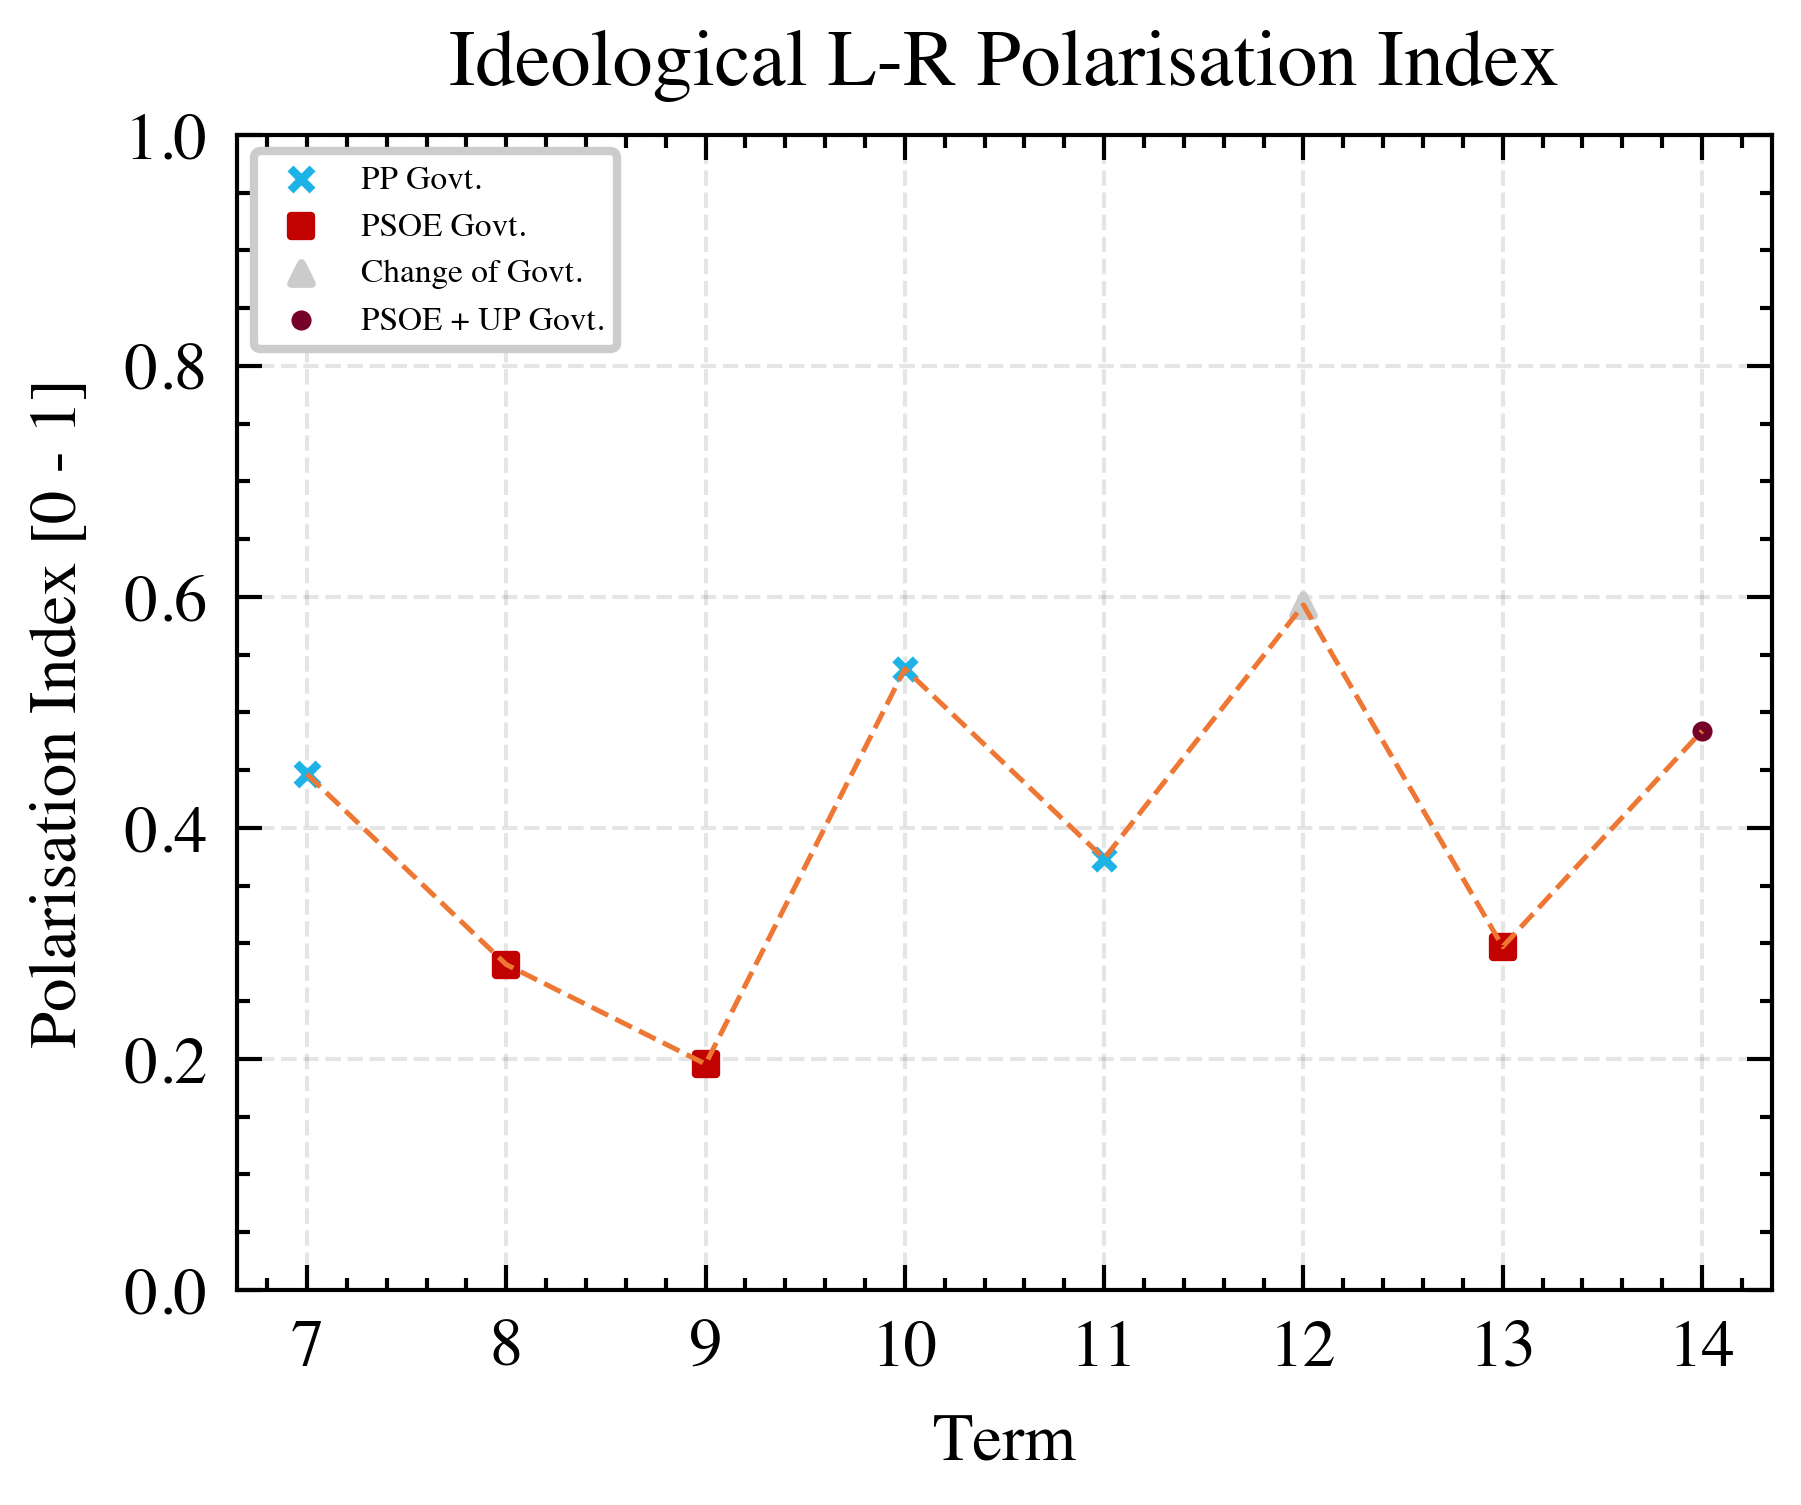

In [18]:
fig, ax = plt.subplots()

ax.scatter(idx[0:1], pol_index[0:1], marker='x', c='#1eb3e6', label='PP Govt.', s=7)
ax.scatter(idx[1:3], pol_index[1:3], marker='s', c='#c10200', label='PSOE Govt.', s=6)
ax.scatter(idx[3:5], pol_index[3:5], marker='x', c='#1eb3e6', s=6)
ax.scatter(idx[5:6], pol_index[5:6], marker='^', c='#cbcbcb', label='Change of Govt.', s=6)
ax.scatter(idx[6:7], pol_index[6:7], marker='s', c='#c10200', s=6)
ax.scatter(idx[7:8], pol_index[7:8], marker='.', c='#750227', label='PSOE + UP Govt.', s=8)

ax.plot(idx, pol_index, linestyle='--', lw=.6)



ax.set(title='Ideological L-R Polarisation Index',
       ylabel='Polarisation Index [0 - 1]',
       xlabel = 'Term',
       yticks = [0, .2, .4, .6, .8, 1],
       xticks = [7, 8, 9, 10, 11, 12, 13, 14])

ax.grid(alpha=.1)
ax.legend(fontsize=4, loc='upper left')


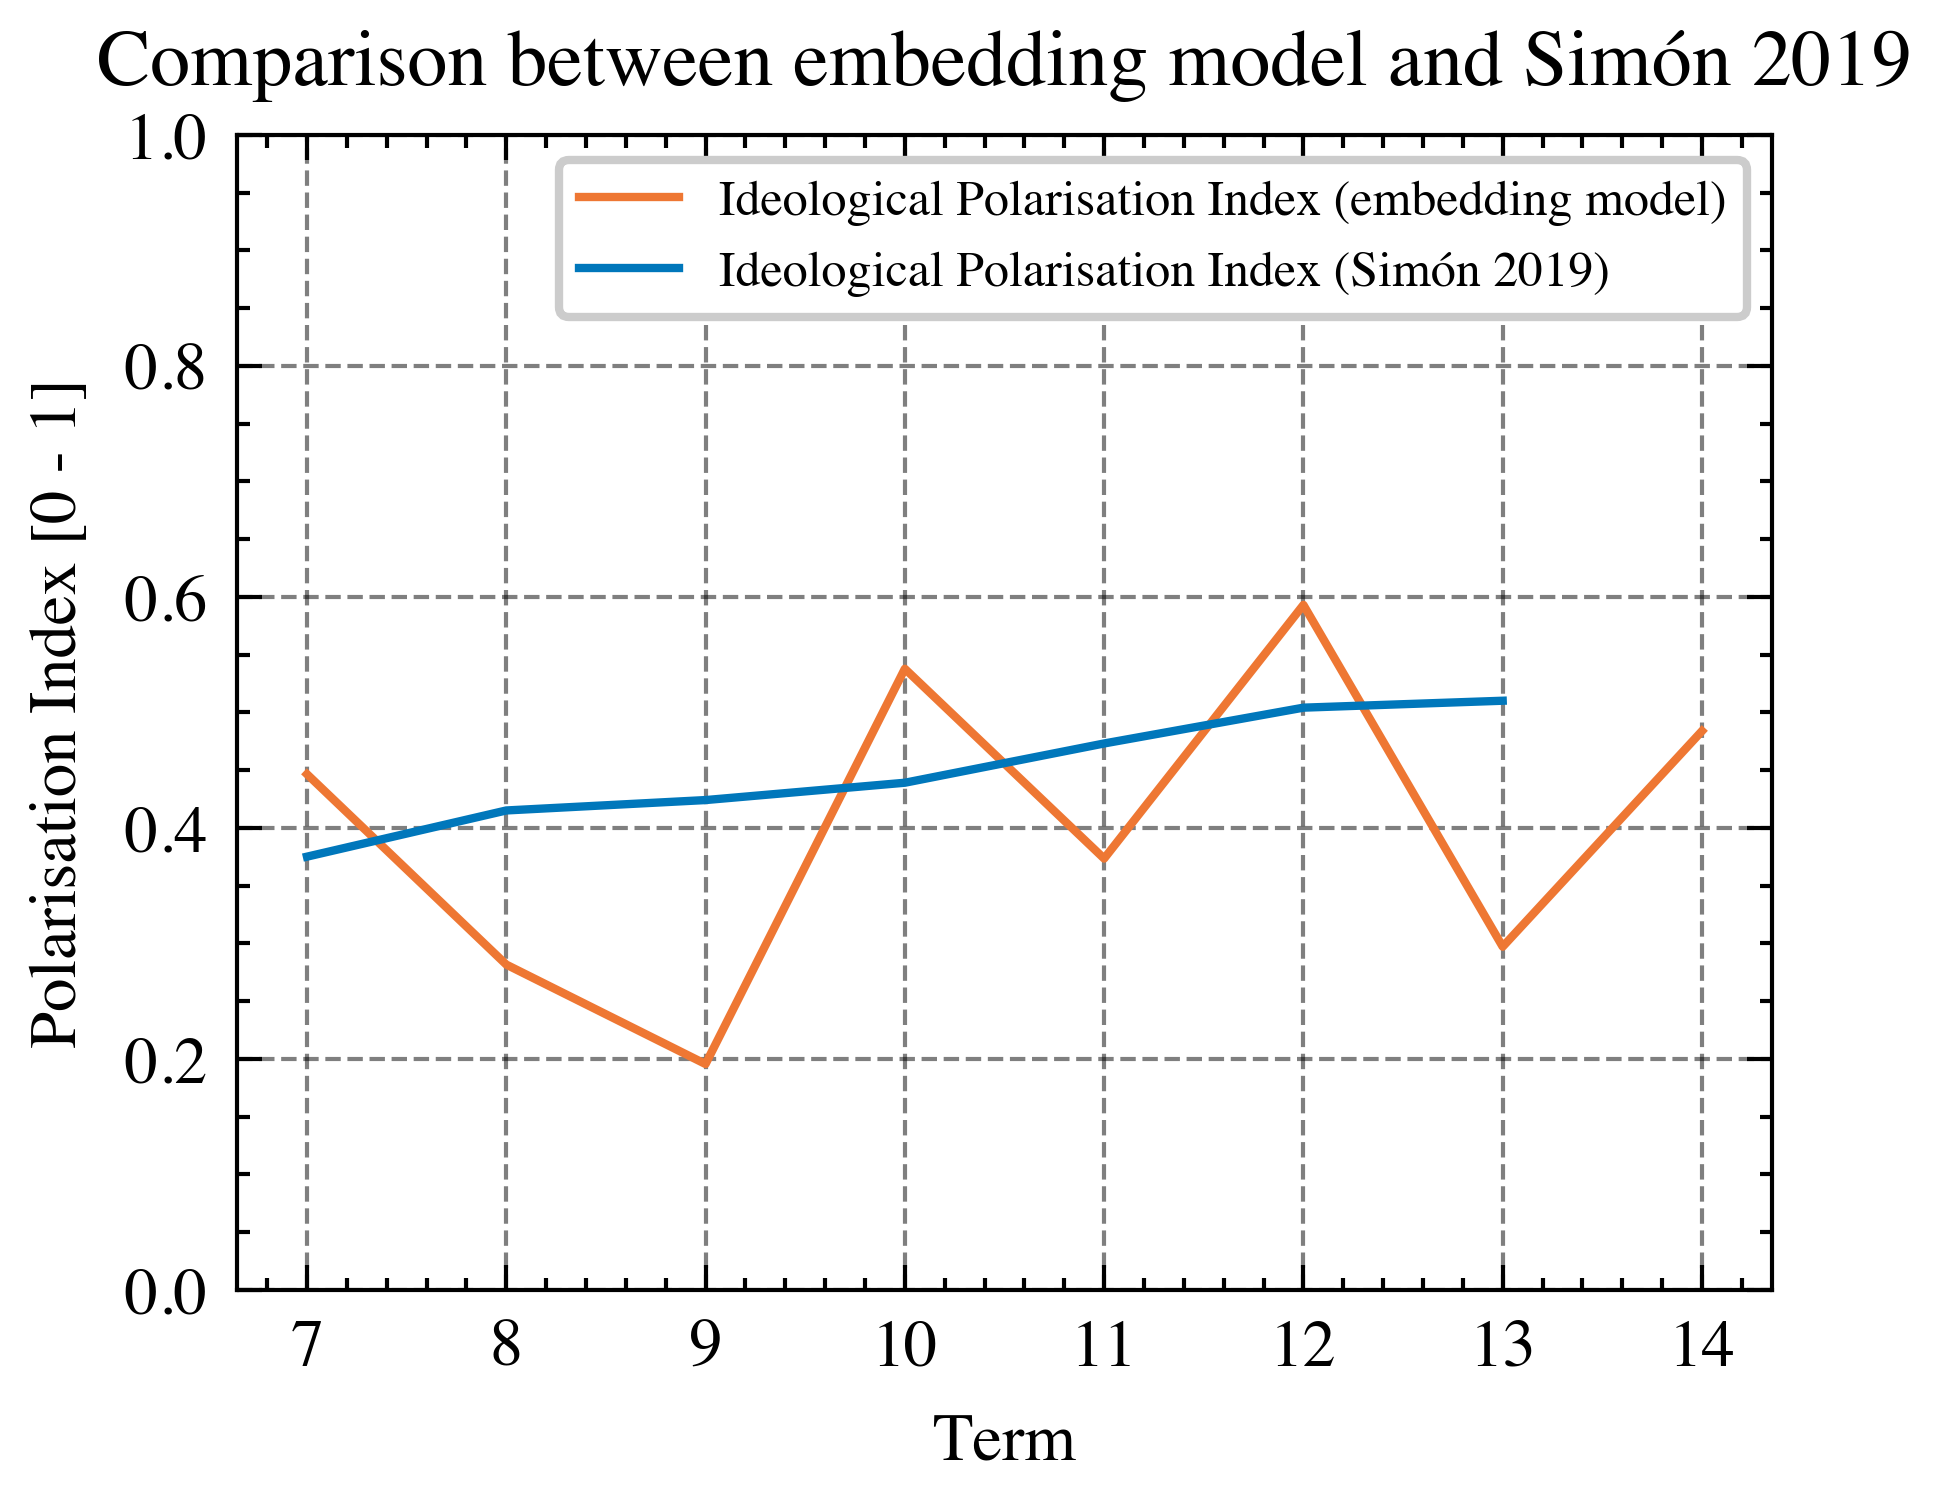

In [19]:
fig, ax = plt.subplots()

ax.plot(idx, pol_index, label='Ideological Polarisation Index (embedding model)')
ax.plot(simon * 0.1, label= 'Ideological Polarisation Index (Simón 2019)')

ax.set(title='Comparison between embedding model and Simón 2019',
       ylabel='Polarisation Index [0 - 1]',
       xlabel='Term',
       yticks=[0, .2, .4, .6, .8, 1],
       xticks=[7, 8, 9, 10, 11, 12, 13, 14])

ax.legend(fontsize=6)



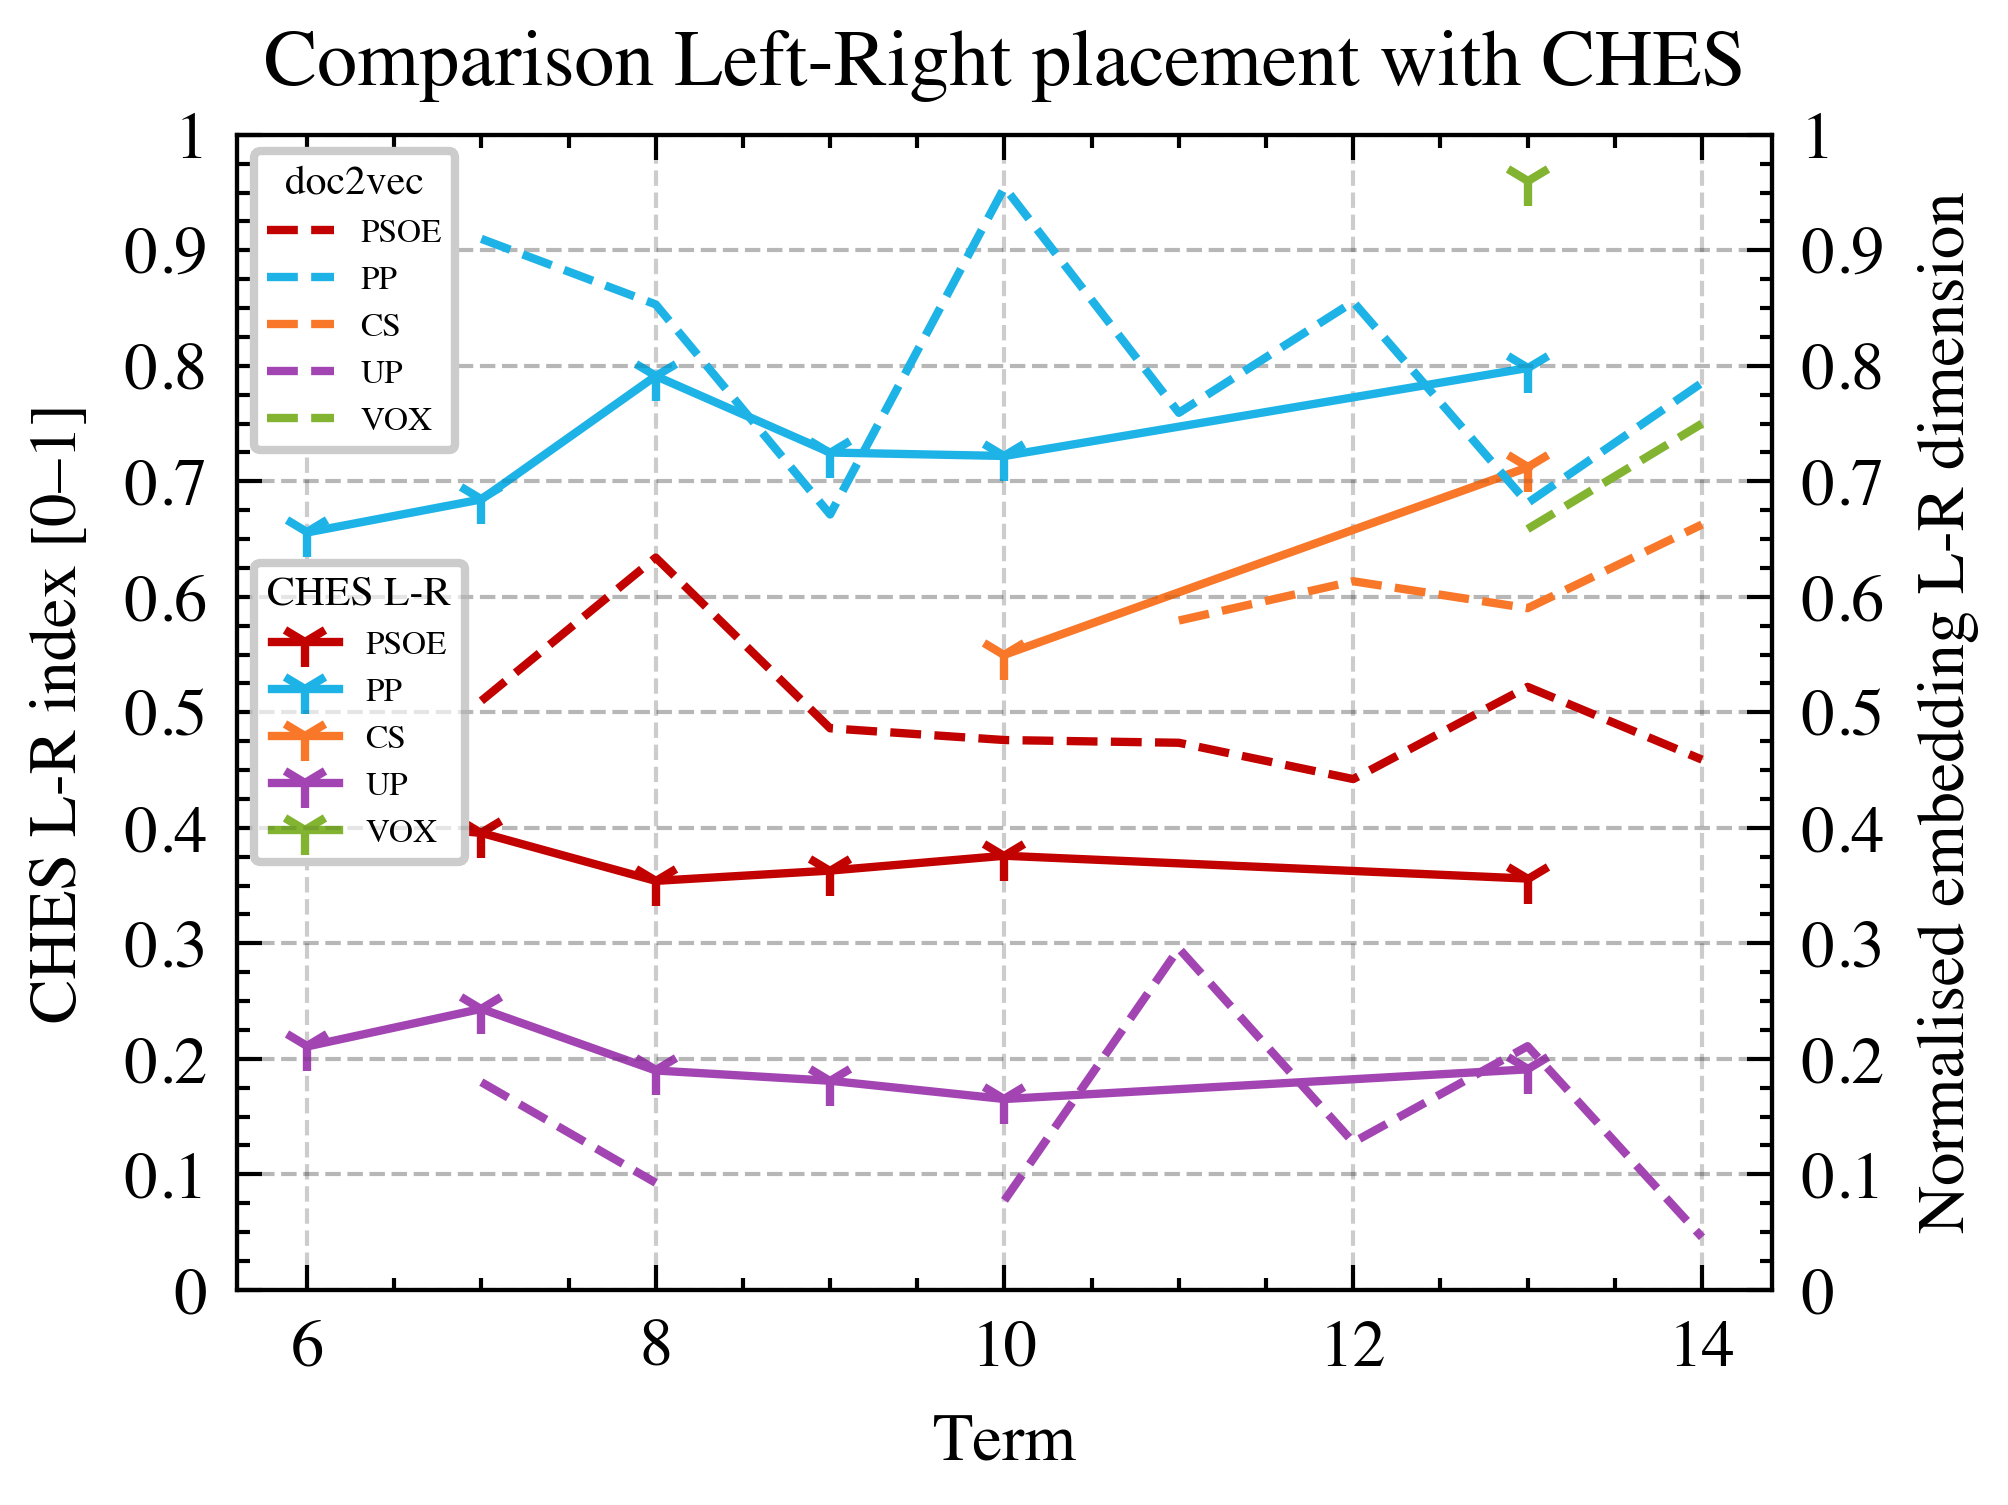

In [22]:
import matplotlib
fig, ax = plt.subplots()

psoemask = np.isfinite(CHES.PSOE)
ppmask = np.isfinite(CHES.PP)
csmask = np.isfinite(CHES.CS)
upmask = np.isfinite(CHES.UP)
voxmask = np.isfinite(CHES.VOX)

ax.plot(CHES.PSOE[psoemask]/10, label='PSOE', c='#c10200', marker='1')
ax.plot(CHES.PP[ppmask]/10, label='PP', c='#1eb3e6', marker='1')
ax.plot(CHES.CS[csmask]/10, label='CS', c='#f87729', marker='1')
ax.plot(CHES.UP[upmask]/10, label='UP', c='#a245b2', marker='1')
ax.plot(CHES.VOX[voxmask]/10, label='VOX', marker='1', lw=1, c='#82b431')
ax.legend(title='CHES L-R', fontsize='4', title_fontsize=5, loc='center left')
ax.set_title('Comparison Left-Right placement with CHES')
ax.set_xlabel('Term')

ax.grid(alpha=.2)

ax2 = ax.twinx()
ax2.plot(r.PSOE, label='PSOE', c='#c10200', ls='--')
ax2.plot(r.PP, label='PP', c='#1eb3e6', ls='--')
ax2.plot(r.CS, label='CS', c='#f87729', ls='--')
ax2.plot(r.UP, label='UP', c='#a245b2', ls='--')
ax2.plot(r.VOX, label='VOX', lw=1, c='#82b431', ls='--')
ax2.legend(title='doc2vec', fontsize='4', title_fontsize=5)

ax.set_yticks([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1])

ax.set_yticks(np.linspace(ax.get_ybound()[0], ax.get_ybound()[1], 11))
ax2.set_yticks(np.linspace(ax2.get_ybound()[0], ax2.get_ybound()[1], 11))

ax.set_ylabel('CHES L-R index [0–1]')
ax2.set_ylabel('Normalised embedding L-R dimension')

ax.set_yticklabels(['0', '0.1', '0.2', '0.3', '0.4',
                    '0.5', '0.6', '0.7', '0.8', '0.9', '1'])
ax2.set_yticklabels(['0', '0.1', '0.2', '0.3', '0.4',
                     '0.5', '0.6', '0.7', '0.8', '0.9', '1'])
ax2.grid(alpha=.1)

plt.show()
